<a href="https://colab.research.google.com/github/LCaravaggio/NLP/blob/main/02_b%C3%A1sicas/Word_Cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
!pip install gutenbergpy

In [88]:
import gutenbergpy.textget

text=gutenbergpy.textget.get_text_by_id(14765)
print(text)

b'The Project Gutenberg EBook of El Gaucho Mart\xc3\xadn Fierro, by Jos\xc3\xa9 Hern\xc3\xa1ndez\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.org\r\n\r\n\r\nTitle: El Gaucho Mart\xc3\xadn Fierro\r\n\r\nAuthor: Jos\xc3\xa9 Hern\xc3\xa1ndez\r\n\r\nRelease Date: January 23, 2005 [EBook #14765]\r\n\r\nLanguage: Spanish\r\n\r\nCharacter set encoding: ISO-8859-1\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK EL GAUCHO MARTIN FIERRO ***\r\n\r\n\r\n\r\n\r\nProduced by La Biblioteca Digital Argentina, formatted by Mariano\r\nCecowski Palacio.\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\nEl Gaucho Mart\xc3\xadn Fierro\r\n\r\nde Jos\xc3\xa9 Hern\xc3\xa1ndez\r\n\r\n\r\nBuenos Aires,\r\nImprenta de La Pampa,\r\nVictoria 79.\r\n\r\n1872.\r\n\r\n\r\n\r\n\r\nCarta del Autor a don Jos\xc3\xa9 Zoilo Mig

In [89]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords

In [90]:
text=str(text.decode('utf-8'))

In [91]:
nltk.download("stopwords")

stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [92]:
stop_words

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

In [93]:
shortword = re.compile(r'\W*\b\w{1,3}\b')
text=shortword.sub('', text)

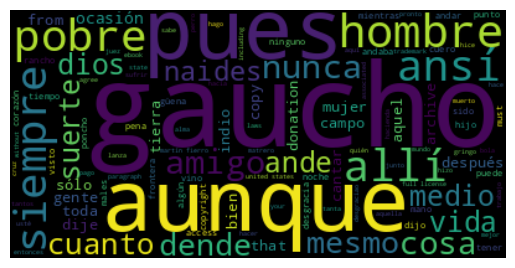

In [94]:
manual=['project', 'gutenberg', 'literary', 'work', 'with', 'ebook', 'electronic', 'work', 'other', 'agreement', 'works', 'this', 'foundation', 'terms']
words = text.lower().split()
filtered_words = [word for word in words if word not in manual]
text = ' '.join(filtered_words)

wordcloud = WordCloud(stopwords=stop_words).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [95]:
text

'gaucho martín fierro josé hernández anyone anywhere cost almost restrictions whatsoever copy, give away under license included online.gutenberg title gaucho martín fierro author: josé hernández release date: january, 2005 [ebook #14765] language: spanish character encoding-8859 *** start gaucho martin fierro *** produced biblioteca digital argentina, formatted mariano cecowski palacio gaucho martín fierro josé hernández buenos aires, imprenta pampa, victoria. 1872. carta autor josé zoilo miguens querido amigo decidido pobre "martín fierro ayudado algunos momentos alejar fastidio vida hotel, salga conocer mundo allá acogido amparo nombre niegue protección conoce bien todos abusos todas desgracias víctima clase desheredada nuestro país pobre gaucho todas imperfecciones forma arte tiene todavía entre ellos toda falta enlace ideas existe siempre sucesión lógica, descubriéndose frecuentemente entre ellas apenas relación oculta remota esforzado presumir haberlo conseguido presentar tipo per

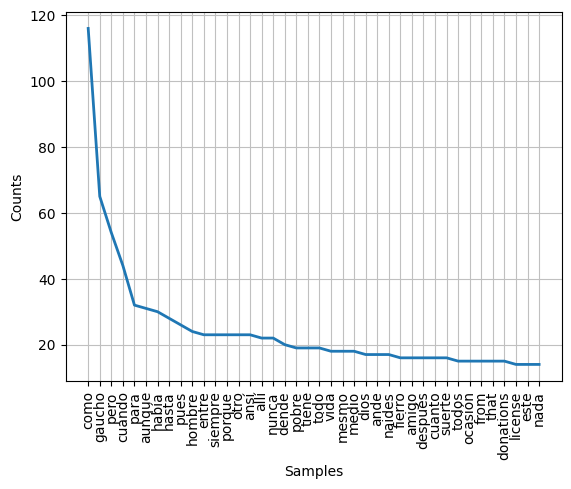

<Axes: xlabel='Samples', ylabel='Counts'>

In [96]:
words = text.lower().split()

fd = nltk.FreqDist(words)
fd.plot(40, cumulative=False, )

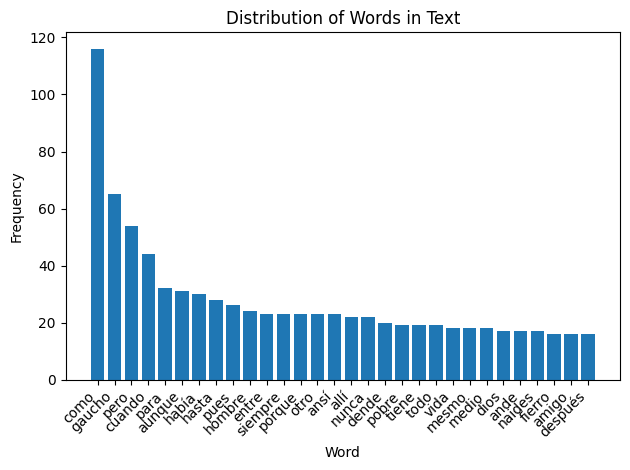

In [97]:
# Sort together by frequency (descending order)
sorted_by_freq = sorted(fd.items(), key=lambda x: x[1], reverse=True)

# Get top 30 most frequent words and counts
word_labels = [item[0] for item in sorted_by_freq[:30]]  # Word labels
word_counts = [item[1] for item in sorted_by_freq[:30]]  # Word counts


# Create bar graph using matplotlib
plt.bar(word_labels, word_counts)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Distribution of Words in Text")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

In [98]:
import pandas as pd

df = pd.DataFrame.from_dict(fd, orient='index', columns=['Frequency'])

df = df.sort_values(by='Frequency', ascending=False)

df.reset_index(inplace=True)
df.columns = ['Word', 'Frequency']

In [99]:
df[:20]

,Word,Frequency
0,como,116
1,gaucho,65
2,pero,54
3,cuando,44
4,para,32
5,aunque,31
6,había,30
7,hasta,28
8,pues,26
9,hombre,24
